In [2]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import time
import cmath
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from apiclient.http import MediaFileUpload

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams['lines.linewidth'] = 3
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=22)
plt.rc('lin')


In [3]:
def generate_values(n, N, W):
    generated_signal = np.zeros(N)
    start = time.time()
    for i in range(n):
        fi = 2*math.pi*random.random()
        A = 5 * random.random()
        w = W-i*W/(n)
        
        x = A * np.sin(np.arange(0, N, 1) * w + fi)
        generated_signal += x
        
    print(f"Execution time: {time.time() - start}")
#     upload_to_drive("time.txt")
    return generated_signal

In [22]:
def draw(arr, x_label, y_label, title, legend, file_name=None):
    result, = plt.plot(range(len(arr)), arr, '-', label=legend)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    return result

In [5]:
def write_file(content, file_name="time.txt"):
    with open(file_name, "w") as f:
        f.write(content+"\n")

In [6]:
def upload_to_drive(file_name):
    # If modifying these scopes, delete the file token.pickle.
    SCOPES = ['https://www.googleapis.com/auth/drive']

    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('drive', 'v3', credentials=creds)

    #results = service.files().list(
     #   pageSize=10, fields="nextPageToken, files(id, name)").execute()
    #items = results.get('files', [])
    file_metadata = {'name': file_name}
    media = MediaFileUpload(file_name)
    file = service.files().create(body=file_metadata,
                                    media_body=media,
                                    fields='id').execute()

In [7]:
def dft(signal):
    start = time.time()
    N = len(signal)
    spectre = np.zeros(N, dtype=np.complex64)
    for p in range(N):
        spectre[p] = np.dot(signal, np.cos(2 * math.pi * p / N * np.linspace(0, N-1, N))) \
        -1j * np.dot(signal, np.sin(2 * math.pi * p / N * np.linspace(0, N-1, N)))
    print(f"Execution time: {time.time() - start}")
    return spectre

In [8]:
signal = generate_values(6, 256, 2100)

Execution time: 0.0007297992706298828


# Дискретне перетворення Фур'є:

Execution time: 0.028827905654907227


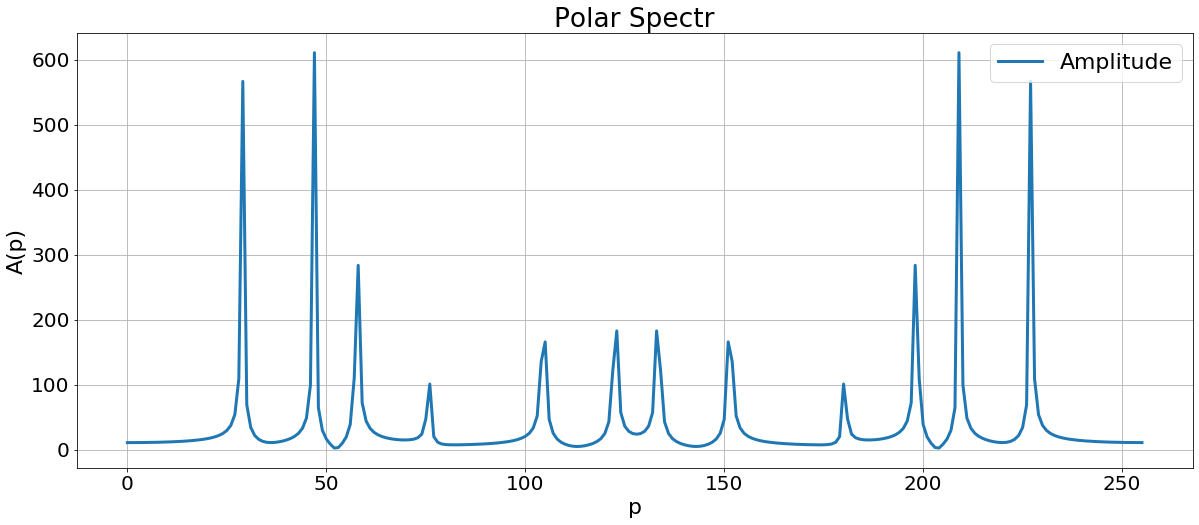

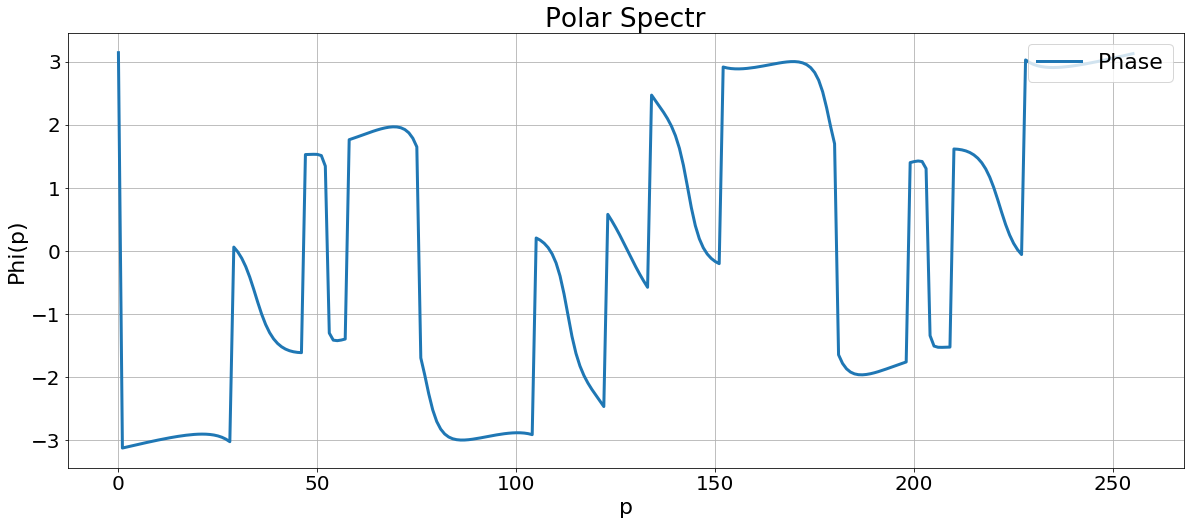

In [9]:
spectr = dft(signal)
polar_spectr = np.array(list(map(lambda x: cmath.polar(x), spectr)))
ampl = draw(polar_spectr[:, 0], "p", "A(p)", "Polar Spectr", "Amplitude")
plt.legend(handles=[ampl], loc='upper right')
plt.grid()
plt.show()
phase = draw(polar_spectr[:, 1], "p", "Phi(p)", "Polar Spectr", "Phase")
plt.legend(handles=[phase], loc='upper right')
plt.grid()
plt.show()

# Швидке перетворення Фур'є:

In [10]:
def fft(signal):
    start = time.time()
    N = len(signal)
    spectre = np.zeros(N, dtype=np.complex64)
    for p in range(N//2):
        E_m = np.dot(
            signal[0:N:2], 
            np.cos(2 * math.pi * p / (N / 2) * np.arange(0, N // 2, 1))
        ) -1j * np.dot(
            signal[0:N:2],
            np.sin(2 * math.pi * p / (N / 2) * np.arange(0, N // 2, 1))
        )
        
        W_p = (np.cos(2 * math.pi * p / N) - 1j * np.sin(2 * math.pi * p / N))
        
        O_m = np.dot(
            signal[1:N:2], 
            np.cos(2 * math.pi * p / (N / 2) * np.arange(0, N // 2, 1))
        ) -1j * np.dot(
            signal[1:N:2],
            np.sin(2 * math.pi * p / (N / 2) * np.arange(0, N // 2, 1))
        )
        
        spectre[p] = E_m + W_p * O_m
        spectre[p + N // 2] = E_m - W_p * O_m
    print(f"Execution time: {time.time() - start}")
    return spectre

Execution time: 0.006648063659667969


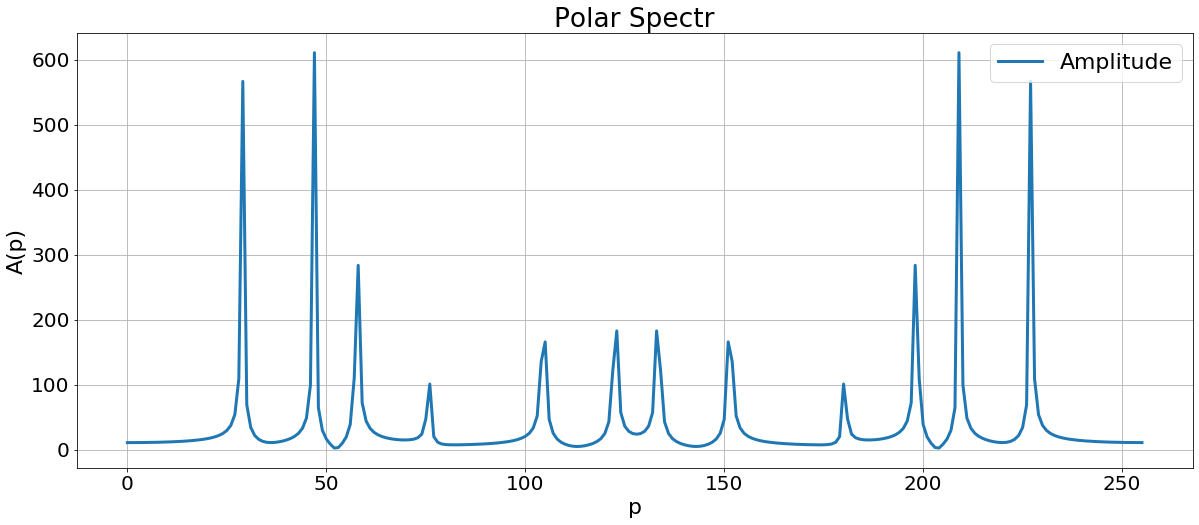

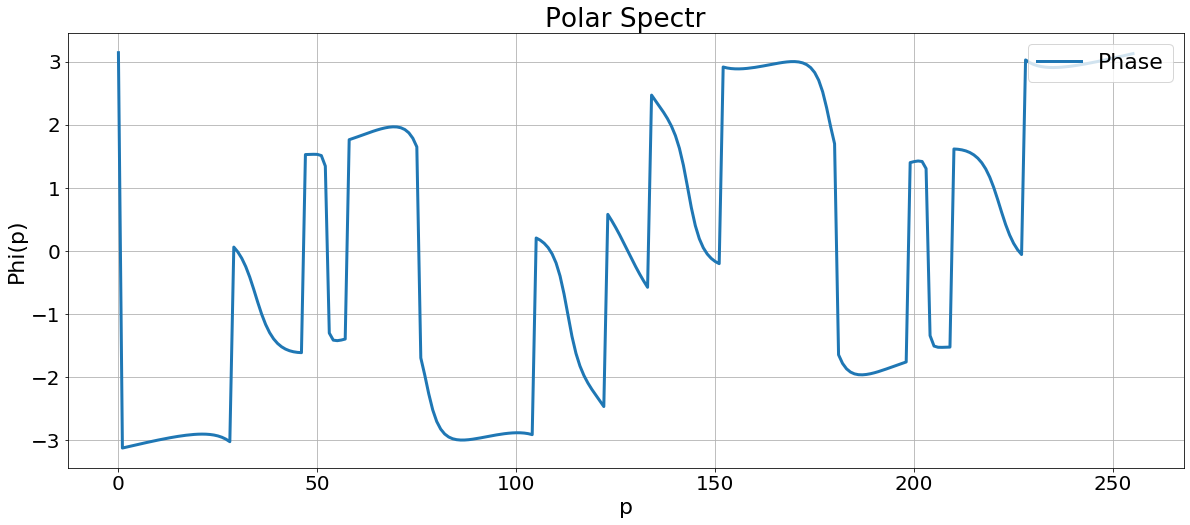

In [11]:
spectr = fft(signal)
polar_spectr = np.array(list(map(lambda x: cmath.polar(x), spectr)))
ampl = draw(polar_spectr[:, 0], "p", "A(p)", "Polar Spectr", "Amplitude")
plt.legend(handles=[ampl], loc='upper right')
plt.grid()
plt.show()
phase = draw(polar_spectr[:, 1], "p", "Phi(p)", "Polar Spectr", "Phase")
plt.legend(handles=[phase], loc='upper right')
plt.grid()
plt.show()

# Додаткове завдання:

Execution time: 0.013126134872436523


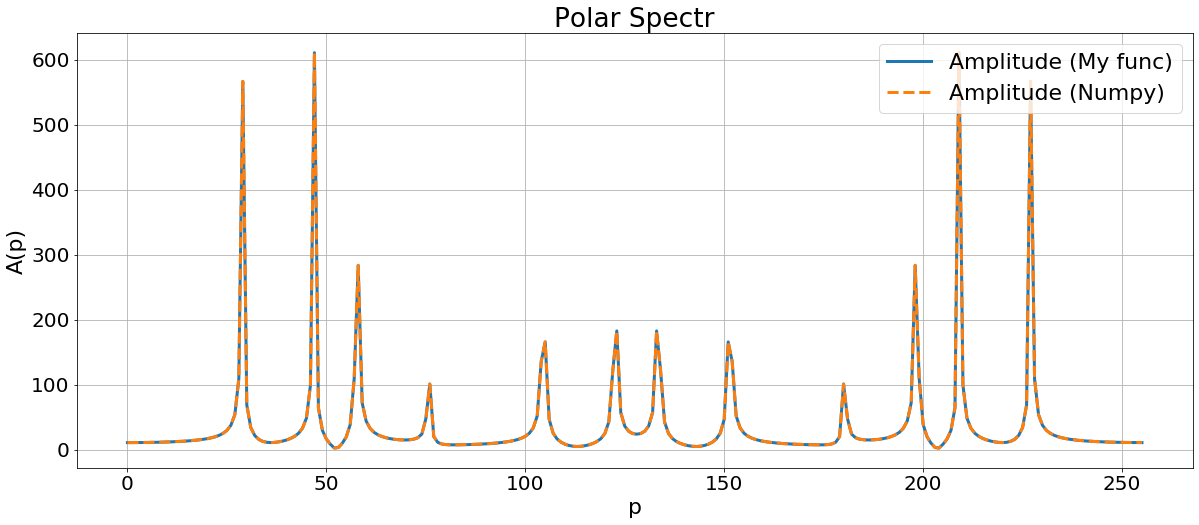

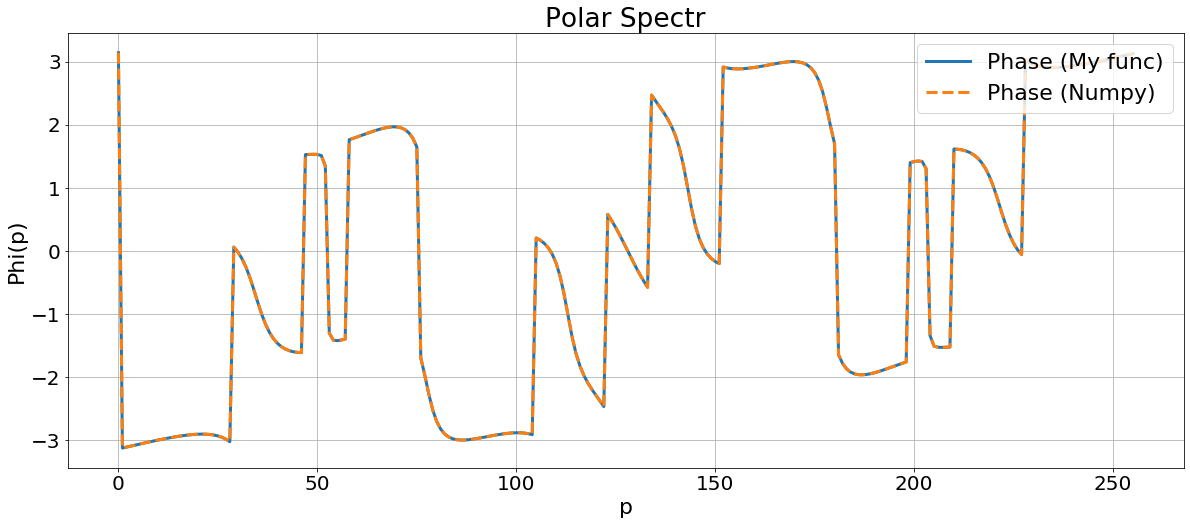

In [25]:
result_mine = fft(signal)
result_np = np.fft.fft(signal)

polar_spectr_mine = np.array(list(map(lambda x: cmath.polar(x), result_mine)))
polar_spectr_np = np.array(list(map(lambda x: cmath.polar(x), result_np)))

ampl_mine = draw(polar_spectr_mine[:, 0], "p", "A(p)", "Polar Spectr", "Amplitude (My func)")
ampl_np,  = plt.plot(range(len(result_np)), polar_spectr_np[:, 0], "--", label="Amplitude (Numpy)")

plt.legend(handles=[ampl_mine, ampl_np], loc='upper right')
plt.grid()
plt.show()

phase_mine = draw(polar_spectr_mine[:, 1], "p", "Phi(p)", "Polar Spectr", "Phase (My func)")
phase_np, = plt.plot(range(len(result_np)), polar_spectr_np[:, 1], "--", label="Phase (Numpy)")

plt.legend(handles=[phase_mine, phase_np], loc='upper right')
plt.grid()
plt.show()

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


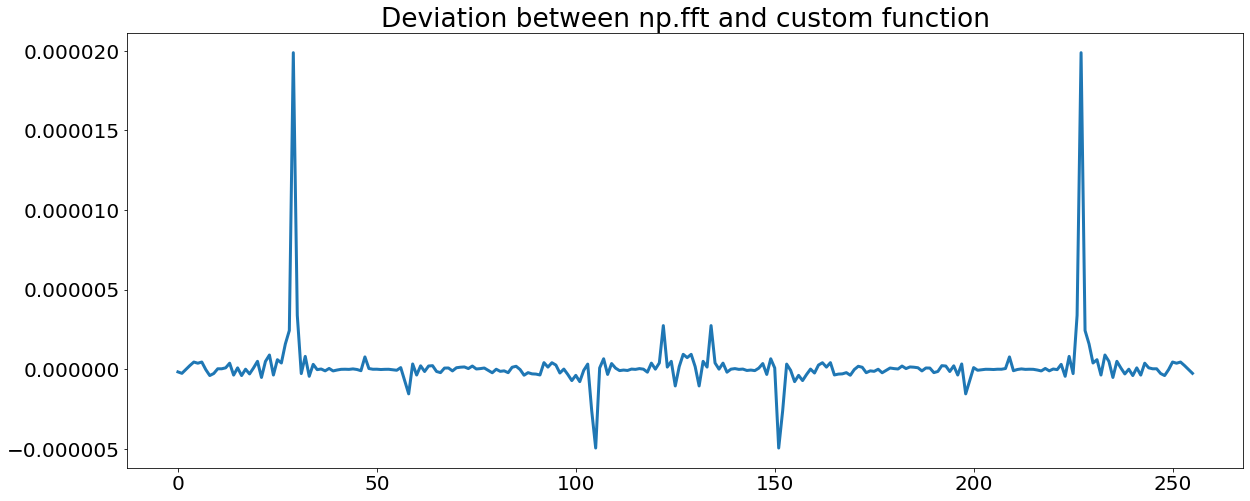

In [28]:
deviation = result_mine - result_np
plt.plot(range(len(deviation)), deviation)
plt.title("Deviation between np.fft and custom function")
plt.show()